In [1]:
#Outline for the project
# import libraries

import pandas as pd 
%matplotlib inline
import numpy as np


In [50]:
# import the data 
df = pd.read_csv('f835051.csv')
df

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,orig__golden,orig__unit_id,_updated_at,endurl,nil,please_make_your_relevancy_judgment_gold,please_make_your_relevancy_judgment_gold_reason,query,starturl,type
0,834019659,11/20/2015 23:28:32,True,1808535686,NaN,11/20/2015 23:27:48,False,clixsense,0.8000,22045386,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
1,834019659,11/20/2015 23:34:43,True,1808544750,NaN,11/20/2015 23:28:55,False,neodev,0.9250,34677122,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
2,834019659,11/20/2015 23:36:30,True,1808547317,NaN,11/20/2015 23:36:13,False,bitcoinget,0.8000,21865639,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
3,834019659,11/20/2015 23:38:56,True,1808550769,NaN,11/20/2015 23:28:44,False,clixsense,1.0000,32879647,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
4,834019659,11/20/2015 23:39:31,True,1808551770,NaN,11/20/2015 23:36:46,False,neodev,1.0000,11029231,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
5,834019659,11/20/2015 23:43:24,True,1808557578,NaN,11/20/2015 23:40:26,False,neodev,0.8250,11026598,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
6,834019659,11/20/2015 23:45:34,True,1808560757,True,11/20/2015 23:45:07,False,elite,0.7750,33950313,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
7,834019659,11/20/2015 23:46:02,True,1808561612,NaN,11/20/2015 23:45:22,False,clixsense,0.8250,33949049,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
8,834019659,11/20/2015 23:47:05,True,1808563321,True,11/20/2015 23:45:32,False,neodev,0.7500,30316109,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0
9,834019659,11/20/2015 23:47:23,True,1808563738,NaN,11/20/2015 23:45:49,False,clixsense,0.9048,29528463,...,True,832839064,11/20/2015 00:16:05,http://www.huffingtonpost.com/news/caleb-brata...,0,4\n3,both pages reference Caleb Logan,NaN,http://zap2it.com/2015/10/caleb-logan-bratayle...,0


994
False    9476
Name: _golden, dtype: int64
neodev            4017
clixsense         3232
elite             1533
bitcoinget         349
instagc            270
gifthunterclub      75
Name: _channel, dtype: int64


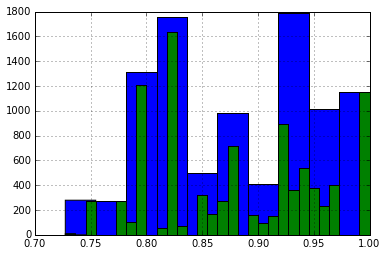

In [255]:
# count unique pairs 
pairs = set(df['_unit_id'])
print len(pairs)

# what is golden? i think that it's their named entity extractor, and it's only applied to a small amount of the data 
print df['_golden'].value_counts()
# conclusion: golden is only available for some of them 
# question: is there any trend to when golden works that would be problematic? 

# how many unique reviewers are there? 
# _id is the unique interaction indentifier, so for each pair and for each reviewer (as many as rows there are)
reviewers = set(df['_id'])
len(reviewers)

# _missed 
df['_missed'].isnull()
# this is mostly just NaN stuff 

# trying out the tainted 
df['_tainted'].value_counts()
len (df['_tainted'])
# none of them are tainted 

# channel analysis
print df['_channel'].value_counts()
# need to figure out what these channels represent 

# check out the trust score 
df['_trust'].hist()
# appears to demonstrate two different populations, one of mediocre ones, and one of great ones who make errors sometimes

# note that some of these lack and end url, which is kind of curious...
df['endurl'].isnull().sum()

# it looks like there's not the same number of observations in each pair of urls
experimental_df.groupby(['starturl', 'endurl']).count()


df['_trust'].hist(bins = 30)

In [95]:
# there are essentially two parts to to this:
# part 1: separate out the golden from the actual data 
experimental_df = df[df['_golden'] == False]

In [92]:
df = experimental_df

# get the unique publisher/advertiser pair along with the unit id for that pair
x = zip(df['starturl'], df['endurl'])
z = dict(zip(x, df['_unit_id']))
set_x = set(x)

start_urls = list()
end_urls = list()
ids = list()

for unique_pair in set_x:
    start_urls.append(unique_pair[0])
    end_urls.append(unique_pair[1])
    ids.append(z[unique_pair])
    

In [103]:
mean_scores = dict()

for unit_id in ids: 
    temp_df = experimental_df[experimental_df['_unit_id'] == unit_id]
    temp_mean = temp_df['please_make_your_relevancy_judgment'].mean()    
    mean_scores[unit_id] = temp_mean   

In [202]:
all_df = pd.DataFrame()
all_df['unit_id'] = ids
all_df['starturl'] = start_urls
all_df['endurl'] = end_urls
all_df['relevance'] = mean_scores.values()

#normalize relevance to be a probability 
all_df['relevance'] = (all_df['relevance'] - all_df['relevance'].min())
all_df['relevance'] = all_df['relevance']/all_df['relevance'].max()

In [206]:
#X = train.ix[:, all_df.columns != 'relevance']
# how to not select a column without dropping anything out 

Y = all_df['relevance'] 
X = all_df['unit_id']

# reshape this bit here 
Y = Y[:,None]
X = X[:,None]

In [232]:
# split into training and testing sets 
np.random.seed(5)
msk = np.random.rand(len(all_df)) < 0.8

#kind of janky to round up or down 
all_df['relevance'] = (all_df['relevance']>.5) + 0

train = all_df[msk]
test = all_df[~msk]

X = train.ix[:, train.columns == 'unit_id']
Y = train['relevance']

In [237]:
 from sklearn.linear_model import LogisticRegression
# initialize and train the model 
clf = LogisticRegression()
clf = clf.fit(X,Y)

from sklearn import tree
#basic tree
#clf = tree.DecisionTreeClassifier(max_depth = 2)
#clf = clf.fit(X, Y)

In [238]:
# test the number that work out 

predicted = clf.predict(test.ix[:, test.columns == 'unit_id'])
correct = predicted == test['relevance']

(sum(correct) + 0.0)/len(correct)

0.82738095238095233

In [250]:
# if i were a complete idiot, how well could i predict this? 

float(all_df['relevance'].value_counts()[0])/all_df['relevance'].count() + 0.0

# so i am just marginally, marginally better than chance 

0.816884661117717

In [ ]:
#X = train.ix[:, all_df.columns != 'relevance']
#the way to not select everything but a particular colum

In [251]:
# it is just guessing that nothing is relevant, and when you look at the data,
print predicted

# 81% of the pairings are not relevant 
float(all_df['relevance'].value_counts()[0])/all_df['relevance'].count()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.816884661117717

In [ ]:
#totally befuddled with this RE stuff:
    #dom_grabber = re.compile("""http://([a-zA-Z0-9\.]+)/2015/10/caleb\-logan\-bratayley\-dies\-13\-natural\-causes/""")
#for url in test_urls:
#    result = re.match(dom_grabber, url)
#    print result.group(1)
    